# Playing with Seismic data

# Step 1: Create a synthetic seismogram

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Ricker wavelet
# -----------------------
def ricker(f0, t):
    a = (np.pi * f0 * t)**2
    return (1 - 2*a) * np.exp(-a)

# -----------------------
# Time axis
# -----------------------
dt = 0.002          # 2 ms sampling
tmax = 2.0          # 2 seconds
t = np.arange(0, tmax, dt)
nt = len(t)


In [4]:
rng = np.random.default_rng(0)
# -----------------------
# Reflectivity (spike train)
# -----------------------
reflectivity = np.zeros(nt)

n_reflectors = 8
times = np.linspace(0.2, 1.8, n_reflectors)

for i, ti in enumerate(times):
    amp = (0.5 + rng.random()) * (-1)**i
    idx = int(ti/dt)
    reflectivity[idx] = amp

In [5]:
# -----------------------
# Wavelet
# -----------------------
f0 = 25.0
tw = np.arange(-0.128, 0.128+dt, dt)
w = ricker(f0, tw)
w /= np.max(np.abs(w))

In [6]:
# -----------------------
# Convolution (clean seismic)
# -----------------------
trace_clean = np.convolve(reflectivity, w, mode="same")


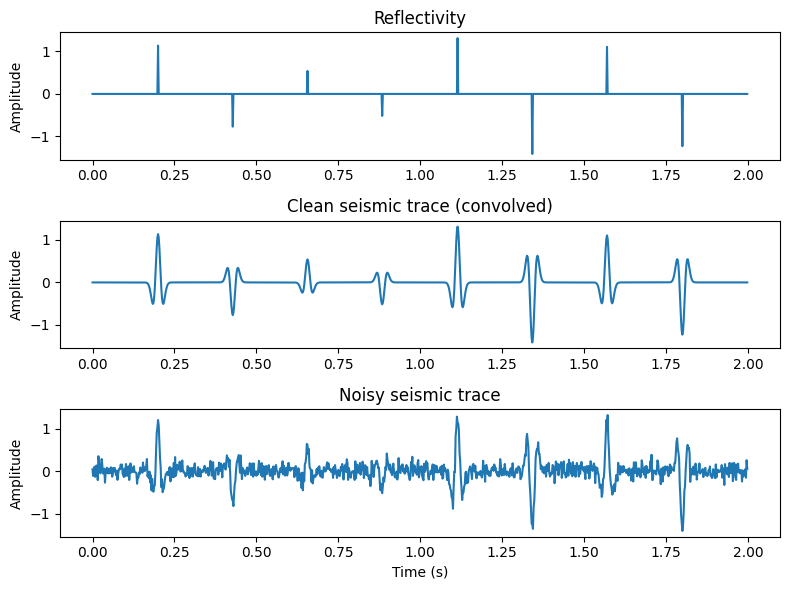

In [42]:
# -----------------------
# Noise components
# -----------------------

# White noise
white = 0.5 * np.std(trace_clean) * rng.standard_normal(nt)

# Low-frequency coherent noise (ground-roll style)
f_low = 8.0
ground = 0.5 * np.std(trace_clean) * np.sin(2*np.pi*f_low*t)
ground *= np.exp(-(t/0.5)**2)  # stronger early time

# Band-limited noise (smooth white noise)
band = rng.standard_normal(nt)
kernel = np.ones(20) / 20
band = np.convolve(band, kernel, mode="same")
band *= 0.20 * np.std(trace_clean)

# Total noisy trace
trace_noisy = trace_clean + white 
# + ground + band

# -----------------------
# Plot
# -----------------------
plt.figure(figsize=(8, 6))

plt.subplot(3,1,1)
plt.plot(t, reflectivity)
plt.title("Reflectivity")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
plt.plot(t, trace_clean)
plt.title("Clean seismic trace (convolved)")
plt.ylabel("Amplitude")

plt.subplot(3,1,3)
plt.plot(t, trace_noisy)
plt.title("Noisy seismic trace")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [43]:
s = 0.002
fs = 1./s          # sampling frequency (Hz)
s = 1 / fs          # sampling interval
fn = 1./ (2*s) 
N = len(t)             # number of samples

X = np.fft.fft(band)
freq = np.fft.fftfreq(N, d=s)

(0.0, 250.0)

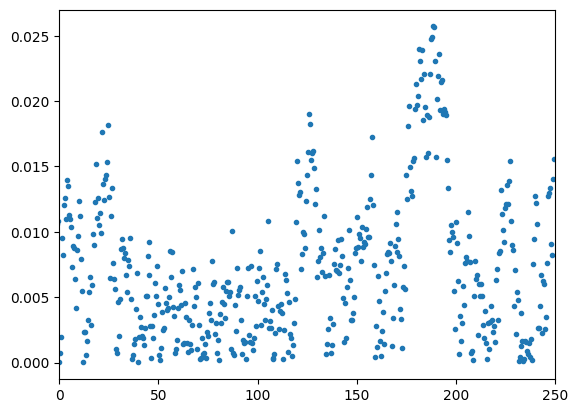

In [44]:
plt.plot(freq, abs(band), '.')
plt.xlim(0, fn)

In [33]:
plt.stem?

Signature:
plt.stem(
    *args: 'ArrayLike | str',
    linefmt: 'str | None' = None,
    markerfmt: 'str | None' = None,
    basefmt: 'str | None' = None,
    bottom: 'float' = 0,
    label: 'str | None' = None,
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    data=None,
) -> 'StemContainer'
Docstring:
Create a stem plot.

A stem plot draws lines perpendicular to a baseline at each location
*locs* from the baseline to *heads*, and places a marker there. For
vertical stem plots (the default), the *locs* are *x* positions, and
the *heads* are *y* values. For horizontal stem plots, the *locs* are
*y* positions, and the *heads* are *x* values.

Call signature::

  stem([locs,] heads, linefmt=None, markerfmt=None, basefmt=None)

The *locs*-positions are optional. *linefmt* may be provided as
positional, but all other formats must be provided as keyword
arguments.

Parameters
----------
locs : array-like, default: (0, 1, ..., len(heads) - 1)
    For vertical stem plots,